# 23 우선순위 큐와 힙

### 23-1 **힙 자료구조란**


1. 우선 순위 큐를 위하여 만들어진 자료구조이다.**우선순위 큐 ? Queue + 우선순위!**
2. 완전 이진 트리의 일종이다.
3. 여러 개의 값들 중에서 최대값이나 최소값을 빠르게 찾아내도록 만들어진 자료구조이다.
4. **파이썬 기준으로 Parent(i) = [i-1/2], Left(i) = 2i+1, Right(i) = 2i+2** 
5. 중복된 값을 허용한다
6. 가장 큰 원소를 찾는 데 최적화된 형태의 이진트리

> 힙은 일종의 반정렬 상태(느슨한 정렬 상태)를 유지한다. 예를 들어, Max-Heap 의 경우 큰 값이 상위 레벨에 있고 작은 값이 하위 레벨에 있다는 것이다. 즉, 부모노드의 값이 자식 노드의 값보다 항상 큰 (Min 일때 작은) 이진 트리를 말한다.

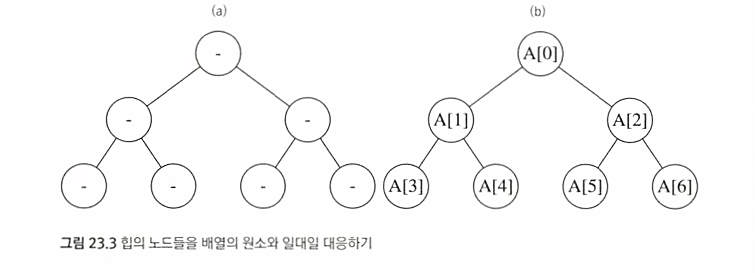

힙은 이진 트리의 일종으로 다음과 같은 특정한 규칙을 만족한다.

1. 부모 노드가 가진 원소는 항상 자식 노드가 가진 원소 이상이다 **힙의 대소 관계 규칙**
2. 마지막 레벨을 제외한 모든 레벨에 노드가 꽉 차 있어야 한다 = **균형 잡힌 트리의 형태가 되게 해준다**
3. 마지막 레벨에 노드가 있을 때는 항상 가장 왼쪽부터 순서대로 채워져 있어야 한다,

> 이러한 조건들로 인해 힙은 트리에 포함된 노드의 개수만으로 트리의 모양이 정해지게 된다. 이에 따라,아래의 일곱개의 원소가 들어있는 구조는 성립할 수 없다.

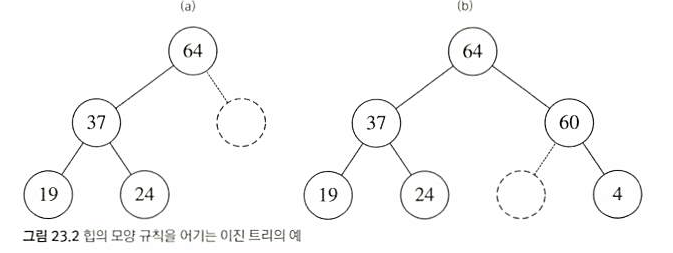

### 23-2 새 원소의 삽입과 원소의 삭제

힙은 **노드의 개수에 따라 트리 형태의 모양이 규칙에 의해 결정된다**. 따라서,
- 새로운 노드는 항상 맨 끝에 추가해서 모양 규칙을 먼저 만족시킨다.
- 노드와 부모노드의 원소들의 크기를 비교하면서 위치를 재 배열시킨다. 

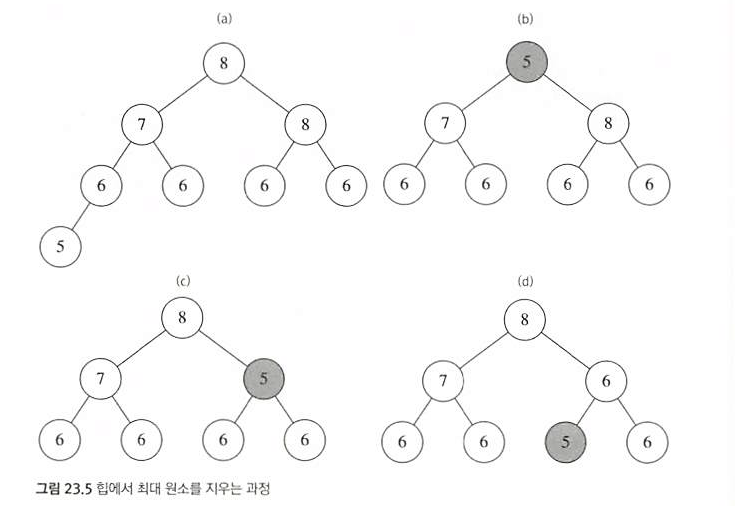


비슷한 방법으로, 최대 원소 삭제는 다음과 같은 방법으로 할 수 있다.

- 가장 큰 원소는 루트 노드에 있는 원소(힙의 규칙에 의해)
- 가장 마지막에 있는 노드를 루트에 놓고 마지막 노드를 삭제하여 모양 규칙을 먼저 만족시킨다.
- 노드와 부모노드의 원소들의 크기를 비교하면서 재 배열한다.

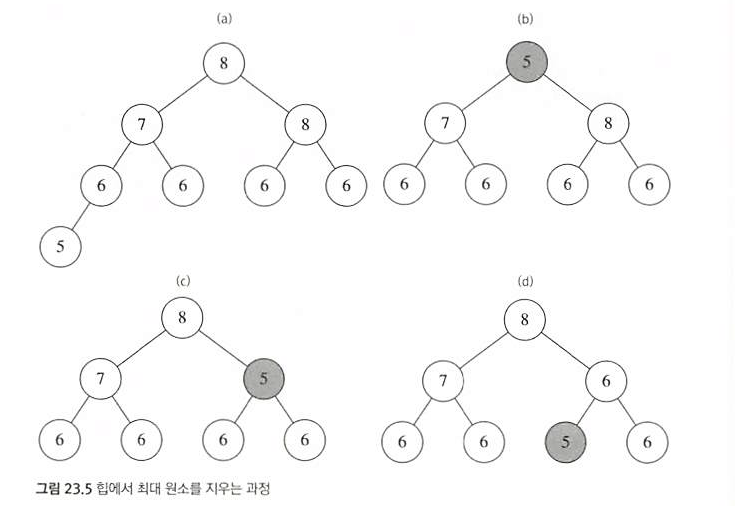

### 참고 코드 - 힙 구조화 하는 코드 

In [1]:
def Max_Heapify(A,i,n):
    """
    A의 Array에서 i번째를 제외한 왼쪽, 오른쪽의 Subtree가 Heap 조건(부모 노드가 자식보다 큼)
    을 만족할 때, 전체 Array가 Heap 조건을 만족하도록 하는 함수(n번의 위치까지)
    """
    l = 2 * i + 1 # i번째 index에서 왼쪽 자식 위치(2i)
    r = 2 * i + 2 # i번째 index에서 오른쪽 자식 위치(2i+1)
    if l < n and A[l] > A[i]:# 왼쪽의 자식노드가 부모노드보다 클 때
        largest = l
    else:
        largest = i
    if r < n and A[r] > A[largest]:
        largest = r # 오른쪽의 자식노드가 부모노드/왼쪽보다 클 때 
    if largest != i:
        temp = A[i]
        A[i] = A[largest]
        A[largest] = temp
        Max_Heapify(A,largest,n)

In [2]:
def Build_Max_Heap(A):
    n = len(A)
    for i in range(len(A)//2, -1, -1):
        Max_Heapify(A,i,n)

In [3]:
a = [4,1,3,2,16,9,10,14,8,7]
Build_Max_Heap(a)
a
# 부모노드가 자식의 노드보다 항상 큰것을 만족하고 있음을 알 수 있다. 

[16, 14, 10, 8, 7, 9, 3, 2, 4, 1]

### 23-3 변화하는 중간 값 

본 문제는 한 수열의 원소가 추가됨으로 인한 중간값(Median) 변화를 도출하는 문제이다.
예를 들어, [3,1,5,4,2] 순서대로 숫자가 추가될 경우 수열의 중간 값은 3,1,3,3,3 순서로 변화한다.
* 단, 수열의 길이가 짝수일 때는 가운데 있는 두 값 중 보다 작은 것을 중간 값으로 정의한다.

A[0] = 1983

A[i] = (A[i-1] * a +b)mod 20090711 으로 Random Number를 생성한다.

그리고 출력값은 중간 값 수열들의 합을 20090711로 나눈 나머지으로 한다.

In [3]:
def struct_RNG(n,a,b):
    """
    A[i] = (A[i-1] * a +b)mod 20090711의 난수를 생성하는 함수 (길이 n)
    """
    ret = []
    ret.append(1983)
    for i in range(n):
        temp = ret[i]
        ret.append((a*temp+b) % 20090711)
    return ret

In [123]:
array = struct_RNG(10,1,1)
array 

[1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993]

In [4]:
import heapq
def runningMedain(n,a,b):
    """
    움직이는 중간값을 더해서 20090711로 나눈 나머지 값을 도출하는 함수.
    여기서 heapq 모듈은 최소 힙 (Min - Heap)을 기준으로 하기 때문에 최대 힙을 만족하기 위해서
    Max - Heap 에서만 (-num) 이라는 우선순위를 같이 넣어줌
    """
    ranlist = struct_RNG(n,a,b)
    maxheap = []; minheap =[]
    # 빈 maxheap과 minheap을 넣음
    ret = 0
    for cnt in range(0,n):        
        # 반으로 나눴을 때, Maxheap이 Minheap의 개수보다 하나가 많거나 같아야 함
        if len(maxheap) == len(minheap):
            heapq.heappush(maxheap, (-ranlist[cnt], ranlist[cnt]))
        else:
            heapq.heappush(minheap, ranlist[cnt])
        
        # 정렬된 상태에서 반으로 나누고 이를 Maxheap, Minheap나눴기에
        # Maxheap의 최대값 (첫 번째 원소)는 Minheap의 최소값 (첫 번째 원소)보다 작아야함
        if (len(minheap)!= 0) and (len(maxheap) != 0) and (minheap[0] < maxheap[0][1]):
        # 위와 같은 조건을 만족하지 못했을 때, 바꾸는 작업
            a = maxheap[0][1]; b = minheap[0]
            heapq.heappop(maxheap); heapq.heappop(minheap)
            heapq.heappush(maxheap, (-b,b)); heapq.heappush(minheap, a)
        ret = (ret + maxheap[0][1]) 
    return ret % 20090711

In [5]:
# Test Data
print(runningMedain(10,1,0),runningMedain(10,1,1),runningMedain(10000,1273,4936))

19830 19850 2448920
